# Applied Mathematics 115: Mathematical Modeling  
---
*2024 Spring / Full Term*

**Meeting Time:**  
Tuesday 10:30 AM - 11:45 AM  
Thursday 10:30 AM - 11:45 AM
<br>
<br>

**Instructors:**  
*Michael P. Brenner* (Pierce Hall 313) brenner@seas.harvard.edu  
Francesco Mottes fmottes@seas.harvard.edu  

**Teaching Fellows:**  
Henry Bae henrybae@college.harvard.edu  
Sarah Martinson sarahmartinson@g.harvard.edu  
Shruti Sharma ssharma1@g.harvard.edu  
Al Shodiev alshodiev@college.harvard.edu  
Alex Sullivan alexsullivan@college.harvard.edu  
Matt Tibbitts mtibbitts@college.harvard.edu  





# Monte Carlo Methods

Monte Carlo methods originated during the Manhattan Project in the 1940s, when Stanislaw Ulam and John von Neumann started useing random sampling to deal with complex mathematical problems related to netron diffusion in the core of atomic weapons. On [Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method#History) you can find a better exposition of the interesting story behind the invention of this technique.

The central intuition behind Monte Carlo models is to exploit randomness and statistical sampling to approximate the solution of problems that may be analytically intractable.

In this notebook we will deal with some basic illustrative examples of what Monte Carlo methods can be useful for.


# Estimate the value of π

We are somewhat used to take for granted that the area of a circle is $A=\pi r^2$ and that $\pi \approx 3.14$.

Imagine now that you forget what the actual value is, or that you want an estimate of that value to an arbitrary precision that cannot find tabulated (this is indeed a very remote scenario, the value of π has been calculated up to [62,831,853,071,796 digits](https://www.guinnessworldrecords.com/world-records/66179-most-accurate-value-of-pi#:~:text=The%20most%20accurate%20value%20of,Switzerland%2C%20on%2019%20August%202021.) ).

Luckily, you still remember the formula for the area of the circle and the one for the area of the square. So you know that if you take a square of side $l = 1$ it will have an area of $A_{sq} = l^2 = 1$, and if you inscribe in the square a quarter of circle with radius $r = l = 1$ like shown below the area of the circular sector will be $A_{cs} = \frac{\pi r^2}{4}$.

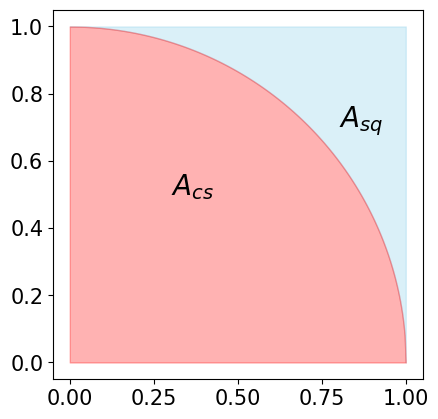

Now if you find a cheap way to shoot **uniformly at random in the square**, the probability of any point being inside the circle sector will be $P(A_{cs}) = \frac{A_{cs}}{A_{sq}} = \frac{\pi}{4}$. But you can also get a numerical estimate $\hat P(A_{cs}) = \frac{(\#\ points\ in\ circle\ sector)}{\#\ total\ shots}$.

The intuition is that once you have the coordinates of a point it's very easy to check if it's inside or outside the circle. So the plan is to shoot a series of uniformly distributed random points in the unit square, and approximate

$$
\hat \pi = 4 \frac{(\#\ points\ in\ circle\ sector)}{\#\ total\ shots}
$$

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

In [ ]:
#number of points
N = int(1e4)

#draw points uniformly in the square
pts = np.random.uniform(0,1,size=(N,2))

#check which points are in the circle sector
hits = (pts[:,0] < np.sqrt(1 - pts[:,1]**2))

#count hits
n_hits = np.sum(hits)

#estimate pi
pi = 4 * (n_hits/N)

print(f'Estimated pi value:\t {pi}')

Estimated pi value:	 3.1596


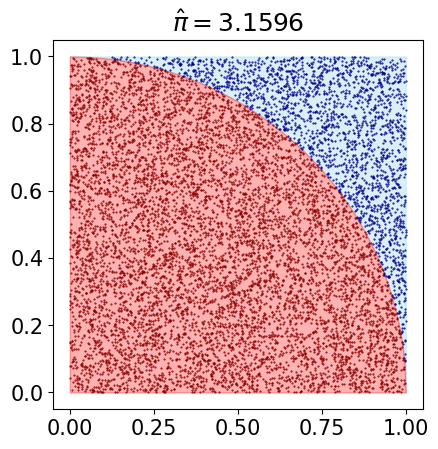

In [ ]:
### VISUALIZATION

plt.plot(pts[hits][:,0], pts[hits][:,1], '.', markersize=1, color='darkred')
plt.plot(pts[~hits][:,0], pts[~hits][:,1], '.', markersize=1, color='darkblue')


### visualize areas
xx = np.linspace(0,1,300)

plt.fill_between(xx, np.sqrt(1-xx**2), np.ones_like(xx), color='skyblue', alpha=.3)
plt.fill_between(xx, np.zeros_like(xx), np.sqrt(1-xx**2), color='red', alpha=.3)

# plt.text(.3,.5,'$A_{cs}$', fontsize=20)
# plt.text(.8,.7,'$A_{sq}$', fontsize=20)

plt.gca().set_aspect('equal')

plt.title(f'$\hat \pi = {pi}$');

## Scaling

We intuitively understand that the more points we have, the better the approximation. But how fast does our estimate converge to the true value of π?

In [ ]:
#define function that returns pi estimate for a certain N
def estimate_pi(N):

    pts = np.random.uniform(0,1,size=(N,2))

    n_hits = np.sum(pts[:,0] < np.sqrt(1 - pts[:,1]**2))

    pi = 4 * (n_hits/N)

    return pi

In [ ]:
# create a list of Ns to test
Ns = np.logspace(1,7,25).astype(int)

pi_est = [estimate_pi(n) for n in Ns]

#or equivalent:
#pi_est = list(map(estimate_pi, Ns))

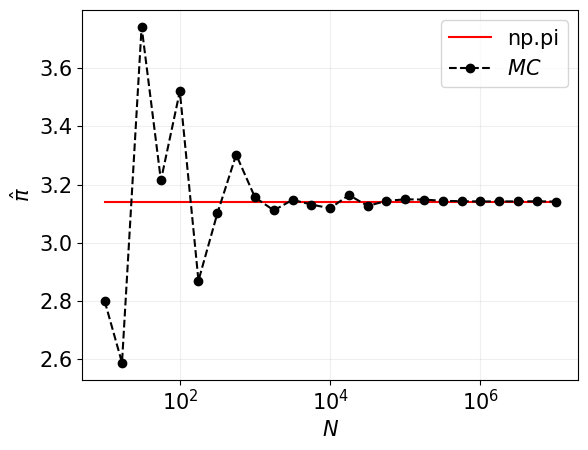

In [ ]:
#plot and compare to np.pi tabulated value

plt.plot(Ns, np.ones_like(Ns)*np.pi, 'r-', label='np.pi')

plt.plot(Ns, pi_est, 'ko--', label='$MC$')

plt.xscale('log')

plt.xlabel('$N$')
plt.ylabel('$\hat \pi$')

plt.grid(alpha=.2)

plt.legend();

# Markov Chain Monte Carlo (MCMC)

Markov chain monte carlo (MCMC) methods are a specialized version of monte carlo methods that sample from complex target distributions by constructing and simulating a Markov Chain.


MORE DETAILS??

# The Knapsack Problem

Your holidays are ending, and you are sadly packing up to go back home. You got slightly carried away in a shopping spree, and now you cannot fit everything in your luggage or you will exceed the weight limit. In order to minimize your losses, you would like to maximize the value of the objects you will be able to bring back home.

Suppose the to have $n$ objects, each with weight $w_i \in \{w_1, w_2, ..., w_n\}$ and values $v_i \in \{v_1, v_2, ..., v_n\}$. The maximum amount of weight you are allowed to carry is $W$. You indicate whether you want to include object $i$ by changing the value of a checkbox $x_i \in \{0,1\}$.

We can now formalize your problem as:

Maximize the total value $V = \sum_{i=0}^n x_i v_i$ subject to the constraint $\sum_{i=0}^n x_i w_i \leq W$.

**NOTE 1:** You might be tempted to solve this problem by brute force enumeration, that is evaluating every possible knapsack combination and choosing the one with highest value. This is certainly feasible for small numbers of objects, but the possible configurations to evaluate scale as $2^N$. If you swap your knapsack with a container ship with hundreds of containers to choose from, you have no hope to even get close to full enumeration.

**NOTE 2:** Both the definition of total value and total weight, upon closer inspection, turn out to be dot products between item abundance vector and value or weight vector respectively!

## Basic MCMC

The first basic idea could be to sample randomly only from feasible solutions (i.e. respecting the weight constraint), evaluate their value and keep track of the best solution you've found so far.

This strategy has some limitation, mainly the fact that you are constrained to jump between feasible states alone. If the best solution is isolated, one step away from solutions that are not feasible, you will never find it.


In [ ]:
n = 10 #available objects

W = 100

w = np.random.randint(50, size=n)
v = np.random.randint(100, size=n)

print(f'Total number of objects:\t{n}')
print(f'Maximum knapsack weight:\t{W}')

Total number of objects:	10
Maximum knapsack weight:	100


In [ ]:
trials = 1000

#initialize with no objects
x = np.zeros_like(w)
best_x = x.copy()
best_v = 0


#log x value and best value in time
v_t = [0]
best_v_t = [0]

for _ in range(trials):

    #choose index to reverse
    i = np.random.randint(0,x.shape[0])

    #proposed new composition vector with object i flipped
    x_new = x.copy()
    if 0 == x[i]:
        x_new[i] = 1
    else:
        x_new[i] = 0

    new_v = v @ x_new # DOT PRODUCT

    #check x_new is feasible
    if w @ x_new <= W:

        x = x_new
        new_v = v @ x_new

        v_t.append(new_v)

        #if better that the rest, update best solution
        if new_v > best_v:
            best_v = new_v
            best_x = x_new

        best_v_t.append(best_v)

print('Best solution found:')
print('--------------------------------------')

print(f'No. of objects:\t\t\t{best_x.sum()}')
print(f'Best value:\t\t\t{best_v}')
print(f'Total weight (max {W}):\t\t{best_x @ w}')


Best solution found:
--------------------------------------
No. of objects:			7
Best value:			387
Total weight (max 100):		92


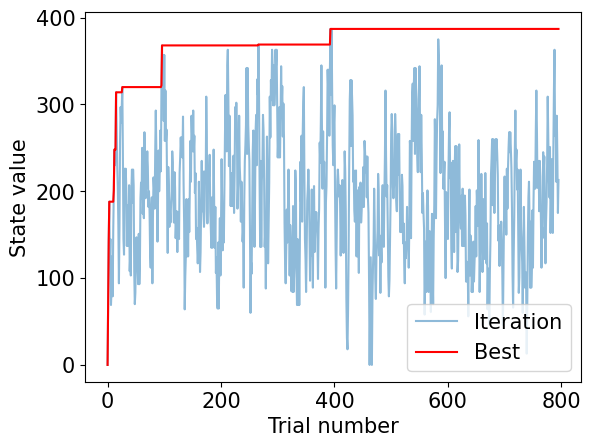

In [ ]:
plt.plot(v_t, alpha=.5, label='Iteration')
plt.plot(best_v_t, 'r', label='Best')

plt.xlabel('Trial number')
plt.ylabel('State value')

plt.legend(loc='lower right');

# (Stub) A (slightly) better MCMC

Based on the code given above to solve the Knapsack problem, implement a variant of MCMC that ameliorates the implementation above. The biggest drawback is that only transitions between feasible states are allowed, which potentially excludes some isolated good solutions and might slow down the search process.

One simple way to overcome this is to implement the following heuristic:
- if the proposed new state is feasible, always transition to the new state
- if the proposed new state is not feasible, transition to the new state with a certain probability $\epsilon$.

The new paramenter $\epsilon$ will govern how much the algorithm is allowed to explore states that are not immediately helpful (like infeasible ones).

**HINT:** You should modify the conditional in the code that now checks for infeasibility only. Remember that the check for feasibility must always be applied before updating the best state anyway!!

**NOTE:** An even more refined version of this might take into account some feature of the proposed new state to calculate a different $\epsilon$ (e.g. the higher the excess weight of the new state, the lower the probability of accepting it). This is the basic idea behind the well known *Metropolis-Hastings Algorithm*.